# L03.1 Linear Regression Practice

In [1]:
import torch

x = torch.tensor([[1, 2, 3],[4, 5, 6], [7, 8, 9]])
print(x.type())
print(x)

torch.LongTensor
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [2]:
print(x.size())
print(x.shape)
print(x.ndimension())

torch.Size([3, 3])
torch.Size([3, 3])
2


In [3]:
y = torch.FloatTensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[1, 2], [3, 4]]])
print(y.shape)
print(y.ndimension()) # == len(y.shape)

torch.Size([3, 2, 2])
3


In [4]:
print(y)
print("origianl shape: ", y.shape)

y0 =y.unsqueeze(0)
print(y0)
print("unsqueeze(0): ", y0.shape)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[1., 2.],
         [3., 4.]]])
origianl shape:  torch.Size([3, 2, 2])
tensor([[[[1., 2.],
          [3., 4.]],

         [[5., 6.],
          [7., 8.]],

         [[1., 2.],
          [3., 4.]]]])
unsqueeze(0):  torch.Size([1, 3, 2, 2])


In [5]:
x = torch.FloatTensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[1, 2], [3, 4]]])

x0 = x.unsqueeze(0) # [3, 2, 2] --> [1, 3, 2, 2]
x1 = x.unsqueeze(1) # [3, 2, 2] --> [3, 1, 2, 2]
x2 = x.unsqueeze(2) # [3, 2, 2] --> [3, 2, 1, 2]
x3 = x.unsqueeze(3) # [3, 2, 2] --> [3, 2, 2, 1]

print(x0)
print(x1)
print(x2)
print(x3)

tensor([[[[1., 2.],
          [3., 4.]],

         [[5., 6.],
          [7., 8.]],

         [[1., 2.],
          [3., 4.]]]])
tensor([[[[1., 2.],
          [3., 4.]]],


        [[[5., 6.],
          [7., 8.]]],


        [[[1., 2.],
          [3., 4.]]]])
tensor([[[[1., 2.]],

         [[3., 4.]]],


        [[[5., 6.]],

         [[7., 8.]]],


        [[[1., 2.]],

         [[3., 4.]]]])
tensor([[[[1.],
          [2.]],

         [[3.],
          [4.]]],


        [[[5.],
          [6.]],

         [[7.],
          [8.]]],


        [[[1.],
          [2.]],

         [[3.],
          [4.]]]])


In [6]:
xt = x.unsqueeze(0).unsqueeze(1).unsqueeze(0).unsqueeze(5) # 1, 1, 1, 3, 2, 1, 2
print(xt.squeeze().shape)

torch.Size([3, 2, 2])


In [7]:
x.view(3, -1)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.],
        [1., 2., 3., 4.]])

In [8]:
x = torch.FloatTensor([[1, 2], [3, 4], [5, 6]]) # 3 x 2
w = torch.rand(1, 2, dtype=torch.float)  # 2 x 1
b = torch.rand(3, 1, dtype=torch.float)

print(x @ w.T + b)

tensor([[1.6089],
        [3.8755],
        [4.8904]])


In [9]:
w = torch.tensor(4.0, requires_grad=True)
a = w*3
l = a**2
l.backward()
print(w.grad)

tensor(72.)


## Linear Regression 실습

In [10]:
import torch

x_train = torch.FloatTensor([[1, 2], [3, 2], [3, 7], [1, 1], [1, 0]])
y_train = torch.FloatTensor([[4], [8], [23], [1], [-2]])

W = torch.randn(2, 1)
b = torch.randn(1, 1)
print(W, b)

lr = 0.01

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    h = x_train @ W + b
    cost = ((y_train - h)**2).mean()

    cost.backward()

    with torch.no_grad():
        W = W - lr * W.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {W.squeeze().tolist()}, b = {b.squeeze().item()}')


tensor([[-1.3503],
        [-0.5235]]) tensor([[0.1974]])
Epoch 0: Cost = 228.8247528076172, W = [-0.7971804141998291, 0.4944852590560913], b = 0.40315765142440796
Epoch 100: Cost = 2.1431918144226074, W = [0.27292588353157043, 3.248741626739502], b = -0.8996080756187439
Epoch 200: Cost = 1.0859915018081665, W = [0.6914018988609314, 3.229621410369873], b = -1.8261011838912964
Epoch 300: Cost = 0.5579128265380859, W = [1.053904414176941, 3.170423746109009], b = -2.447092056274414
Epoch 400: Cost = 0.2867196500301361, W = [1.320857048034668, 3.1228320598602295], b = -2.887373924255371
Epoch 500: Cost = 0.14735078811645508, W = [1.51303231716156, 3.0881307125091553], b = -3.2024497985839844
Epoch 600: Cost = 0.07572630792856216, W = [1.6508898735046387, 3.063188076019287], b = -3.4282593727111816
Epoch 700: Cost = 0.03891732543706894, W = [1.7497279644012451, 3.0452992916107178], b = -3.59013032913208
Epoch 800: Cost = 0.020000314339995384, W = [1.8205845355987549, 3.0324745178222656], b 

In [11]:
x_test = torch.FloatTensor([[5, 10], [2, 7], [3, 10]])

y_test = x_test @ W + b
print(y_test)

tensor([[35.9998],
        [21.0001],
        [32.0001]])


## Linear Regression with Scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression

x = [[1, 2], [3, 2], [3 ,7], [1, 1], [1, 0]]
y = [[4], [8], [23], [1], [-2]]

lr = LinearRegression() # 모델 생성
lr.fit(x, y) # 학습 (피팅)

print(lr.coef_, lr.intercept_)

[[2. 3.]] [-4.]


In [13]:
x_test = [[5, 10], [2, 7], [10, 3]]
y_test = lr.predict(x_test)
print(y_test)

[[36.]
 [21.]
 [25.]]


# L04.1 Logistic Regression Practice

In [14]:
import torch

x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [15]:
import math

w = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(2001):
    w.requires_grad_(True)
    b.requires_grad_(True)

    h = torch.sigmoid(x_train @ w + b)
    #h = 1 / (1 + math.e ** (-(x_train @ w + b)))

    cost = torch.mean(-y_train * torch.log(h) - (1-y_train) * torch.log(1-h))  # BCE

    cost.backward()

    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {w.squeeze().tolist()}, b = {b.squeeze().item()}')

Epoch 0: Cost = 0.5522533655166626, W = -0.5545852184295654, b = 1.4011971950531006
Epoch 100: Cost = 0.415697306394577, W = -1.525394320487976, b = 4.634708881378174
Epoch 200: Cost = 0.3972998559474945, W = -1.9405348300933838, b = 5.901620388031006
Epoch 300: Cost = 0.39017876982688904, W = -2.2027761936187744, b = 6.695487976074219
Epoch 400: Cost = 0.3866705000400543, W = -2.38805890083313, b = 7.254000663757324
Epoch 500: Cost = 0.38472986221313477, W = -2.5263731479644775, b = 7.669829368591309
Epoch 600: Cost = 0.3835808038711548, W = -2.633063316345215, b = 7.990005016326904
Epoch 700: Cost = 0.38286924362182617, W = -2.7171547412872314, b = 8.242034912109375
Epoch 800: Cost = 0.3824148178100586, W = -2.7844481468200684, b = 8.443523406982422
Epoch 900: Cost = 0.38211771845817566, W = -2.838899850845337, b = 8.606441497802734
Epoch 1000: Cost = 0.3819202184677124, W = -2.8833353519439697, b = 8.739313125610352
Epoch 1100: Cost = 0.3817870616912842, W = -2.9198310375213623, b =

In [16]:
bce = torch.nn.BCELoss()

w = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(2001):
    w.requires_grad_(True)
    b.requires_grad_(True)

    h = torch.sigmoid(x_train @ w + b)

    cost = bce(h, y_train)
    cost.backward()

    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {w.squeeze().tolist()}, b = {b.squeeze().item()}')

Epoch 0: Cost = 0.6519753336906433, W = -0.5400041937828064, b = 0.6898833513259888
Epoch 100: Cost = 0.41791531443595886, W = -1.4881244897842407, b = 4.520236492156982
Epoch 200: Cost = 0.39801058173179626, W = -1.9191697835922241, b = 5.836746692657471
Epoch 300: Cost = 0.39050185680389404, W = -2.1882894039154053, b = 6.651742458343506
Epoch 400: Cost = 0.38684141635894775, W = -2.377485513687134, b = 7.222175598144531
Epoch 500: Cost = 0.3848283588886261, W = -2.5183324813842773, b = 7.645679473876953
Epoch 600: Cost = 0.3836406171321869, W = -2.626786947250366, b = 7.971182823181152
Epoch 700: Cost = 0.3829069435596466, W = -2.712167501449585, b = 8.227095603942871
Epoch 800: Cost = 0.38243910670280457, W = -2.780433416366577, b = 8.431507110595703
Epoch 900: Cost = 0.382133811712265, W = -2.8356399536132812, b = 8.596691131591797
Epoch 1000: Cost = 0.38193097710609436, W = -2.880664587020874, b = 8.731328964233398
Epoch 1100: Cost = 0.38179442286491394, W = -2.9176297187805176, 

In [17]:
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, w) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


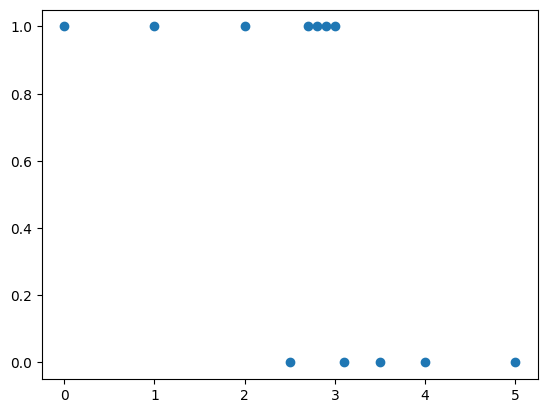

In [18]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)
plt.show()

In [19]:
optimizer = torch.optim.SGD([W, b], lr=1.0)


## Matplotlib으로 결과 시각화

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x1 and 2x1)

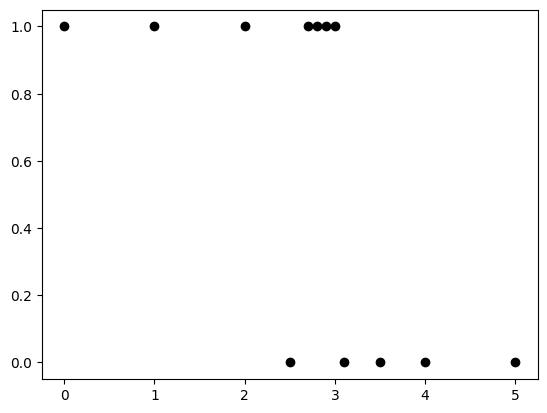

In [22]:
import matplotlib.pyplot as plt

W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train, c="black")

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X, Y, c="#ff0000")
plt.show()

## sklearn에서LogisticRegression사용

In [25]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] 

model = LogisticRegression(penalty=None)
model.fit(x_train,y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5], [1.1]]
test_result = model.predict(x_test)
print(test_result)



[[-3.10428163]] [9.39919938]
[0 1]


# L06.1 Softmax Regression Practice

In [26]:
import torch
x_train = torch.FloatTensor([ [1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7] ])
y_train = torch.FloatTensor([ [0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0] ])

In [27]:
W = torch.randn(4, 3, requires_grad=True)
b = torch.randn(1, 3, requires_grad=True)

optimizer = torch.optim.Adam([W, b], lr=0.1)


In [ ]:
for epoch in range(3001):
    